In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df10 = pd.read_csv('./10days/aggregate_results_no_tuning.csv', index_col=0)
df15 = pd.read_csv('./15days/aggregate_results_no_tuning.csv', index_col=0)
df20 = pd.read_csv('./20days/aggregate_results_no_tuning.csv', index_col=0)
df25 = pd.read_csv('./25days/aggregate_results_no_tuning.csv', index_col=0)

dfs = {'10': df10, '15': df15, '20': df20, '25': df25}

In [97]:
df10

,Parameter-based Transfer MSE,Instance-based Transfer MSE,IEEE 738 MSE,Source Only MSE,Target Only MSE,Source + Target (No Transfer) MSE
4_10,1.265333,3.328333,1.740667,0.807667,3.146667,1.048000
4_8,0.822667,4.750667,0.858000,0.716000,1.997000,0.969667
1_5,0.727000,0.986667,0.737333,0.962667,2.460333,1.124667
1_9,2.768667,2.100667,3.183000,2.147667,8.805333,2.135000
1_4,0.778667,2.276333,0.585667,0.801667,2.713667,1.203667
...,...,...,...,...,...,...
2_0,2.494000,2.027333,0.544000,1.189000,4.141333,1.542667
10_3,1.277667,4.577333,1.459667,1.920333,9.504000,2.157000
0_5,0.538667,1.306333,0.737333,0.669333,2.558667,1.634333
9_7,1.948667,2.188333,0.929667,1.724000,1.294000,0.864667


In [ ]:
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']

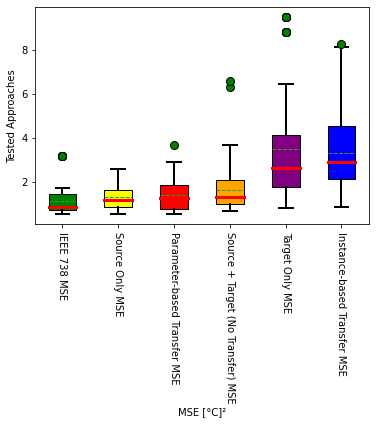

In [114]:

# Calculate median values for each column
medians = df10.median()
# Sort dataframe by median values
df10_sorted = df10.reindex(medians.sort_values().index, axis=1)

colors_reindex = pd.Series(colors, index=df10.columns).reindex(df10_sorted.columns)

# Create the boxplot and pass the colors
boxplot =plt.boxplot(df10_sorted, vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            flierprops=dict(markerfacecolor='green', markersize=8),
            capprops=dict(color='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            medianprops=dict(color='red', linewidth=3),
            showmeans=True, meanline=True, showfliers=True)

for patch, color in zip(boxplot['boxes'], colors_reindex):
    patch.set_facecolor(color)


# set xticks labels with columns from df10_sorted
plt.xticks([y+1 for y in range(len(df10_sorted.columns))], df10_sorted.columns, rotation=90)

plt.xlabel('MSE [°C]²', fontsize=10)
plt.ylabel('Tested Approaches', fontsize=10)
plt.xticks(rotation=-90)

plt.show()

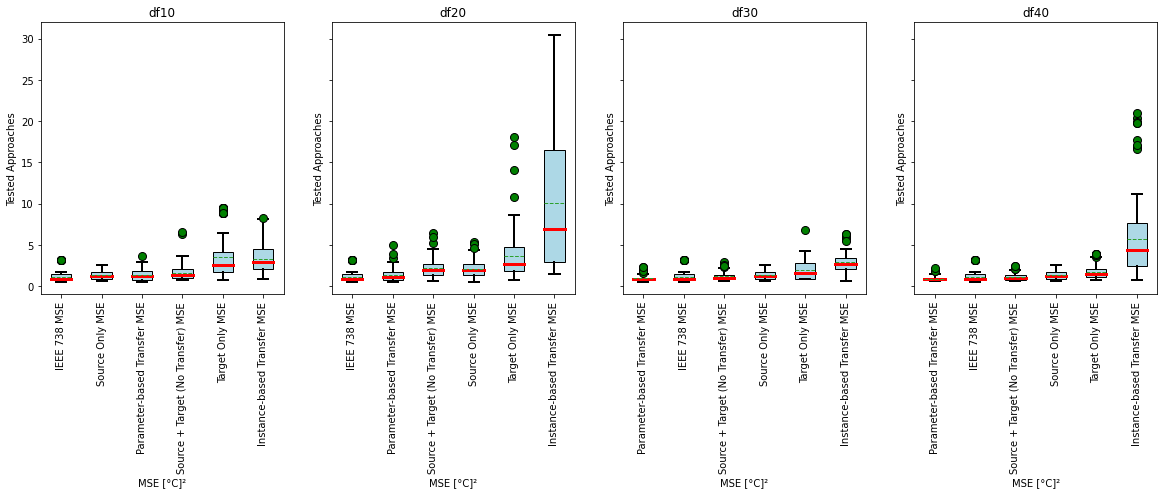

In [117]:
fig, axs = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20,5))
axs = axs.flatten()

dataframes = [df10, df15, df20, df25]
names = ['10 days', '15 days', '20 days', '25 days']

for i, df in enumerate(dataframes):
    medians = df.median()
    df_sorted = df.reindex(medians.sort_values().index, axis=1)
    colors_reindex = pd.Series(colors, index=df.columns).reindex(df_sorted.columns)

    data = [df_sorted[col] for col in df_sorted.columns]
    axs[i].boxplot(data, vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', color='black'),
                flierprops=dict(markerfacecolor='green', markersize=8),
                capprops=dict(color='black', linewidth=2),
                whiskerprops=dict(color='black', linewidth=2),
                medianprops=dict(color='red', linewidth=3),
                showmeans=True, meanline=True, showfliers=True)

    for patch, color in zip(axs[i].artists, colors_reindex):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')

    axs[i].set_xticks([y+1 for y in range(len(df_sorted.columns))])
    axs[i].set_xticklabels(df_sorted.columns, rotation=90)
    axs[i].set_xlabel('MSE [°C]²', fontsize=10)
    axs[i].set_ylabel('Tested Approaches', fontsize=10)
    axs[i].set_title(names[i])

plt.show()


(0.0, 5.0)

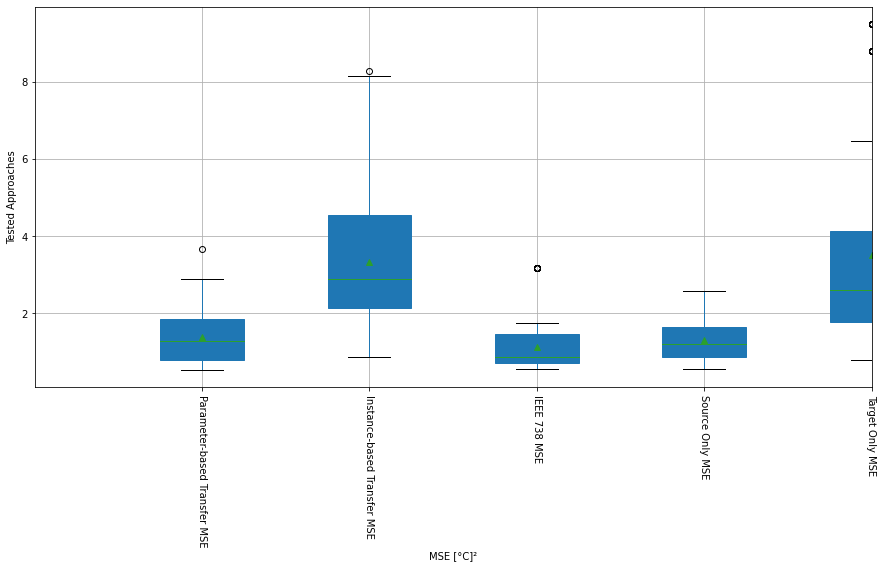

In [96]:
df10.boxplot(figsize=(15,7), fontsize=10, showmeans=True, patch_artist=True)
plt.xlabel('MSE [°C]²', fontsize=10)
plt.ylabel('Tested Approaches', fontsize=10)
plt.xticks(rotation=-90)
plt.xlim(0,5)
# plt.title('Mean Squared Error (MSE) distribution of the tested approaches over all sensors couples, with 10 available days for transfer.', fontsize=20)

# save eps
# plt.savefig('10_days_boxplot.eps', format='eps', bbox_inches='tight', dpi=1000)

#save png
# plt.savefig('10_days_boxplot.png', format='png', bbox_inches='tight', dpi=1000)

In [27]:
dfs_mean = {}
dfs_std = {}
for key, df in dfs.items():
    dfs_mean[key] = df.mean()
    dfs_std[key] = df.std()


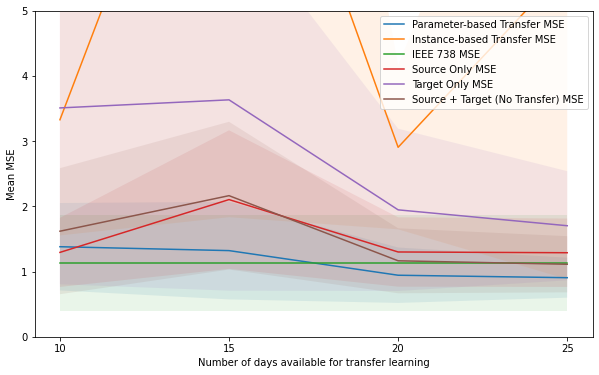

In [28]:

days = list(dfs_mean.keys())
param_mse = [dfs_mean[day]['Parameter-based Transfer MSE'] for day in days]
param_std = [dfs_std[day]['Parameter-based Transfer MSE'] for day in days]
inst_mse = [dfs_mean[day]['Instance-based Transfer MSE'] for day in days]
inst_std = [dfs_std[day]['Instance-based Transfer MSE'] for day in days]
ieee_mse = [dfs_mean[day]['IEEE 738 MSE'] for day in days]
ieee_std = [dfs_std[day]['IEEE 738 MSE'] for day in days]
src_mse = [dfs_mean[day]['Source Only MSE'] for day in days]
src_std = [dfs_std[day]['Source Only MSE'] for day in days]
tgt_mse = [dfs_mean[day]['Target Only MSE'] for day in days]
tgt_std = [dfs_std[day]['Target Only MSE'] for day in days]
src_tgt_mse = [dfs_mean[day]['Source + Target (No Transfer) MSE'] for day in days]
src_tgt_std = [dfs_std[day]['Source + Target (No Transfer) MSE'] for day in days]

param_mse = np.array(param_mse)
param_std = np.array(param_std)

inst_mse = np.array(inst_mse)
inst_std = np.array(inst_std)

ieee_mse = np.array(ieee_mse)
ieee_std = np.array(ieee_std)

src_mse = np.array(src_mse)
src_std = np.array(src_std)

tgt_mse = np.array(tgt_mse)
tgt_std = np.array(tgt_std)

src_tgt_mse = np.array(src_tgt_mse)
src_tgt_std = np.array(src_tgt_std)




fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(days, param_mse, label='Parameter-based Transfer MSE')
ax.fill_between(days, param_mse-param_std, param_mse+param_std, alpha=0.1)

ax.plot(days, inst_mse, label='Instance-based Transfer MSE')
ax.fill_between(days, inst_mse-inst_std, inst_mse+inst_std, alpha=0.1)


ax.plot(days, ieee_mse, label='IEEE 738 MSE')
ax.fill_between(days, ieee_mse-ieee_std, ieee_mse+ieee_std, alpha=0.1)

ax.plot(days, src_mse, label='Source Only MSE')
ax.fill_between(days, src_mse-src_std, src_mse+src_std, alpha=00.1)

ax.plot(days, tgt_mse, label='Target Only MSE')
ax.fill_between(days, tgt_mse-tgt_std, tgt_mse+tgt_std, alpha=00.1)

ax.plot(days, src_tgt_mse, label='Source + Target (No Transfer) MSE')
ax.fill_between(days, src_tgt_mse-src_tgt_std, src_tgt_mse+src_tgt_std, alpha=00.1)

ax.set_ylim(0,5)

plt.xlabel('Number of days available for transfer learning')
plt.ylabel('Mean MSE')
plt.legend()
plt.show()


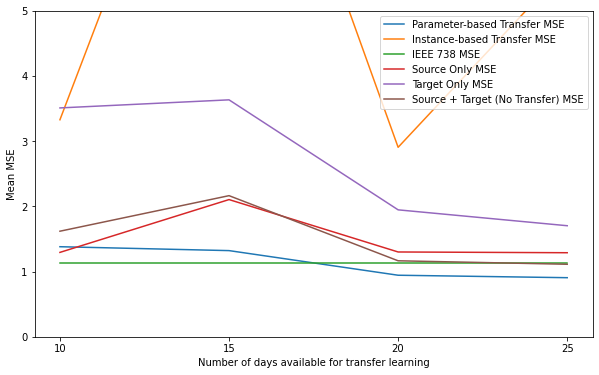

In [29]:

days = list(dfs_mean.keys())
param_mse = [dfs_mean[day]['Parameter-based Transfer MSE'] for day in days]
param_std = [dfs_std[day]['Parameter-based Transfer MSE'] for day in days]
inst_mse = [dfs_mean[day]['Instance-based Transfer MSE'] for day in days]
inst_std = [dfs_std[day]['Instance-based Transfer MSE'] for day in days]
ieee_mse = [dfs_mean[day]['IEEE 738 MSE'] for day in days]
ieee_std = [dfs_std[day]['IEEE 738 MSE'] for day in days]
src_mse = [dfs_mean[day]['Source Only MSE'] for day in days]
src_std = [dfs_std[day]['Source Only MSE'] for day in days]
tgt_mse = [dfs_mean[day]['Target Only MSE'] for day in days]
tgt_std = [dfs_std[day]['Target Only MSE'] for day in days]
src_tgt_mse = [dfs_mean[day]['Source + Target (No Transfer) MSE'] for day in days]
src_tgt_std = [dfs_std[day]['Source + Target (No Transfer) MSE'] for day in days]

param_mse = np.array(param_mse)
param_std = np.array(param_std)

inst_mse = np.array(inst_mse)
inst_std = np.array(inst_std)

ieee_mse = np.array(ieee_mse)
ieee_std = np.array(ieee_std)

src_mse = np.array(src_mse)
src_std = np.array(src_std)

tgt_mse = np.array(tgt_mse)
tgt_std = np.array(tgt_std)

src_tgt_mse = np.array(src_tgt_mse)
src_tgt_std = np.array(src_tgt_std)




fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(days, param_mse, label='Parameter-based Transfer MSE')

ax.plot(days, inst_mse, label='Instance-based Transfer MSE')


ax.plot(days, ieee_mse, label='IEEE 738 MSE')

ax.plot(days, src_mse, label='Source Only MSE')

ax.plot(days, tgt_mse, label='Target Only MSE')

ax.plot(days, src_tgt_mse, label='Source + Target (No Transfer) MSE')

ax.set_ylim(0,5)

plt.xlabel('Number of days available for transfer learning')
plt.ylabel('Mean MSE')
plt.legend()
plt.show()


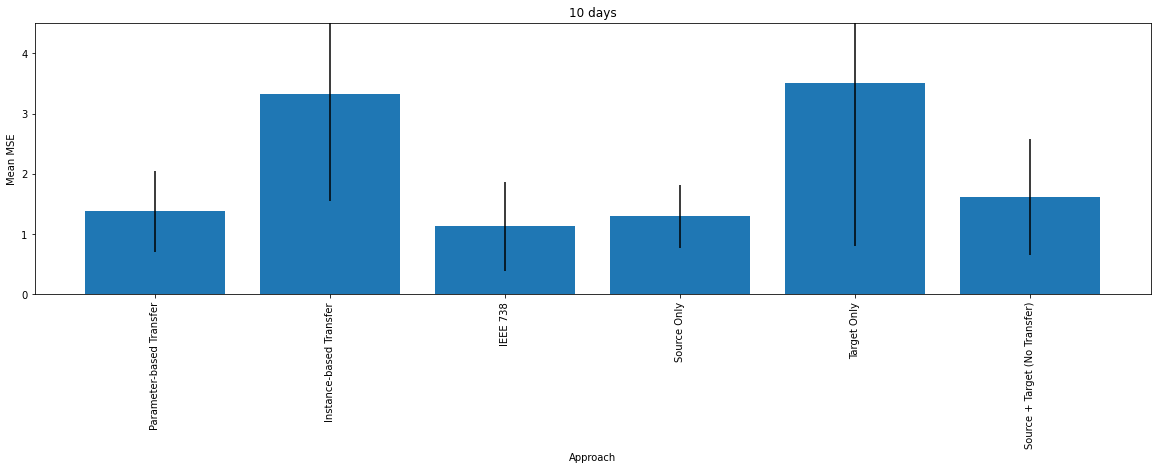

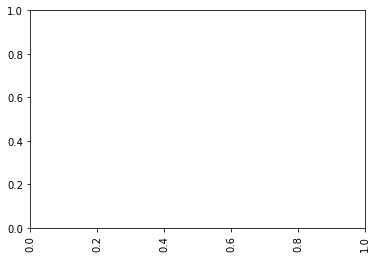

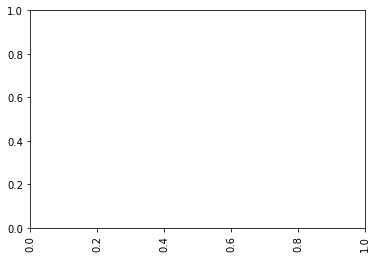

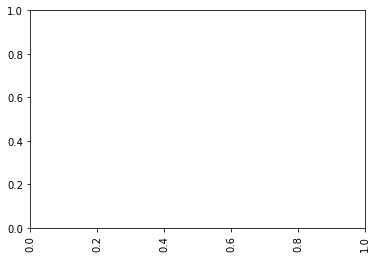

In [63]:
import matplotlib.pyplot as plt




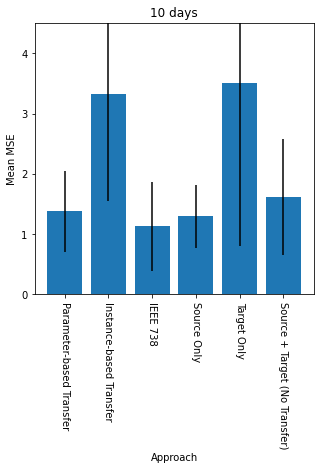

In [69]:
fig, ax = plt.subplots(figsize=(5, 5))

days = list(dfs_mean.keys())
day = days[0]
ax.bar(['Parameter-based Transfer', 'Instance-based Transfer', 'IEEE 738', 'Source Only', 'Target Only', 'Source + Target (No Transfer)'],
        [dfs_mean[day]['Parameter-based Transfer MSE'], dfs_mean[day]['Instance-based Transfer MSE'],dfs_mean[day]['IEEE 738 MSE'],dfs_mean[day]['Source Only MSE'],dfs_mean[day]['Target Only MSE'],dfs_mean[day]['Source + Target (No Transfer) MSE']], 
        yerr=[dfs_std[day]['Parameter-based Transfer MSE'], dfs_std[day]['Instance-based Transfer MSE'], dfs_std[day]['IEEE 738 MSE'], dfs_std[day]['Source Only MSE'], dfs_std[day]['Target Only MSE'], dfs_std[day]['Source + Target (No Transfer) MSE']])

ax.set_title(f'{day} days')
ax.set_ylim(0, max([dfs_mean[day]['Parameter-based Transfer MSE'], dfs_mean[day]['Instance-based Transfer MSE'],dfs_mean[day]['IEEE 738 MSE'],dfs_mean[day]['Source Only MSE'],dfs_mean[day]['Target Only MSE'],dfs_mean[day]['Source + Target (No Transfer) MSE']])+1)
ax.set_ylabel('Mean MSE')
ax.set_xlabel('Approach')

plt.xticks(rotation=-90)


plt.show()


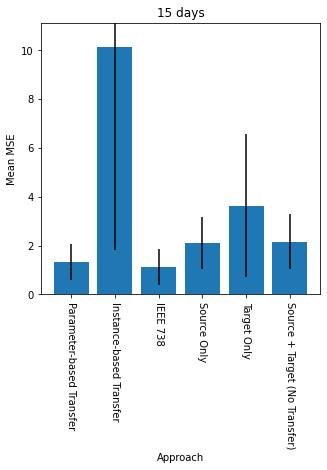

In [70]:
fig, ax = plt.subplots(figsize=(5, 5))

days = list(dfs_mean.keys())
day = days[1]
ax.bar(['Parameter-based Transfer', 'Instance-based Transfer', 'IEEE 738', 'Source Only', 'Target Only', 'Source + Target (No Transfer)'],
        [dfs_mean[day]['Parameter-based Transfer MSE'], dfs_mean[day]['Instance-based Transfer MSE'],dfs_mean[day]['IEEE 738 MSE'],dfs_mean[day]['Source Only MSE'],dfs_mean[day]['Target Only MSE'],dfs_mean[day]['Source + Target (No Transfer) MSE']], 
        yerr=[dfs_std[day]['Parameter-based Transfer MSE'], dfs_std[day]['Instance-based Transfer MSE'], dfs_std[day]['IEEE 738 MSE'], dfs_std[day]['Source Only MSE'], dfs_std[day]['Target Only MSE'], dfs_std[day]['Source + Target (No Transfer) MSE']])

ax.set_title(f'{day} days')
ax.set_ylim(0, max([dfs_mean[day]['Parameter-based Transfer MSE'], dfs_mean[day]['Instance-based Transfer MSE'],dfs_mean[day]['IEEE 738 MSE'],dfs_mean[day]['Source Only MSE'],dfs_mean[day]['Target Only MSE'],dfs_mean[day]['Source + Target (No Transfer) MSE']])+1)
ax.set_ylabel('Mean MSE')
ax.set_xlabel('Approach')

plt.xticks(rotation=-90)


plt.show()


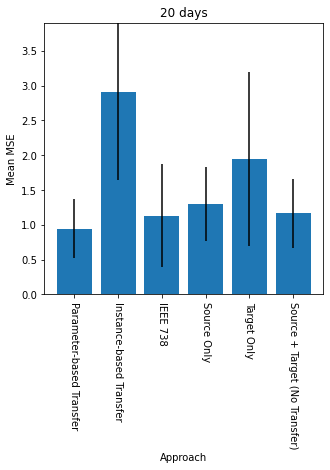

In [71]:
fig, ax = plt.subplots(figsize=(5, 5))

days = list(dfs_mean.keys())
day = days[2]
ax.bar(['Parameter-based Transfer', 'Instance-based Transfer', 'IEEE 738', 'Source Only', 'Target Only', 'Source + Target (No Transfer)'],
        [dfs_mean[day]['Parameter-based Transfer MSE'], dfs_mean[day]['Instance-based Transfer MSE'],dfs_mean[day]['IEEE 738 MSE'],dfs_mean[day]['Source Only MSE'],dfs_mean[day]['Target Only MSE'],dfs_mean[day]['Source + Target (No Transfer) MSE']], 
        yerr=[dfs_std[day]['Parameter-based Transfer MSE'], dfs_std[day]['Instance-based Transfer MSE'], dfs_std[day]['IEEE 738 MSE'], dfs_std[day]['Source Only MSE'], dfs_std[day]['Target Only MSE'], dfs_std[day]['Source + Target (No Transfer) MSE']])

ax.set_title(f'{day} days')
ax.set_ylim(0, max([dfs_mean[day]['Parameter-based Transfer MSE'], dfs_mean[day]['Instance-based Transfer MSE'],dfs_mean[day]['IEEE 738 MSE'],dfs_mean[day]['Source Only MSE'],dfs_mean[day]['Target Only MSE'],dfs_mean[day]['Source + Target (No Transfer) MSE']])+1)
ax.set_ylabel('Mean MSE')
ax.set_xlabel('Approach')

plt.xticks(rotation=-90)


plt.show()


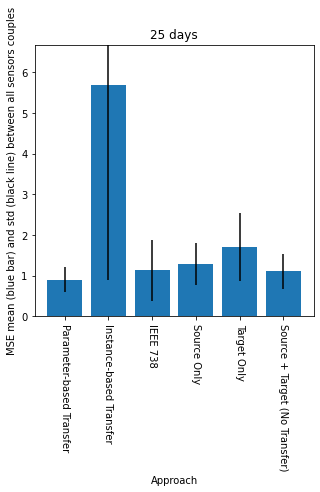

In [86]:
fig, ax = plt.subplots(figsize=(5, 5))

days = list(dfs_mean.keys())
day = days[3]
ax.bar(['Parameter-based Transfer', 'Instance-based Transfer', 'IEEE 738', 'Source Only', 'Target Only', 'Source + Target (No Transfer)'],
        [dfs_mean[day]['Parameter-based Transfer MSE'], dfs_mean[day]['Instance-based Transfer MSE'],dfs_mean[day]['IEEE 738 MSE'],dfs_mean[day]['Source Only MSE'],dfs_mean[day]['Target Only MSE'],dfs_mean[day]['Source + Target (No Transfer) MSE']], 
        yerr=[dfs_std[day]['Parameter-based Transfer MSE'], dfs_std[day]['Instance-based Transfer MSE'], dfs_std[day]['IEEE 738 MSE'], dfs_std[day]['Source Only MSE'], dfs_std[day]['Target Only MSE'], dfs_std[day]['Source + Target (No Transfer) MSE']])

ax.set_title(f'{day} days')
ax.set_ylim(0, max([dfs_mean[day]['Parameter-based Transfer MSE'], dfs_mean[day]['Instance-based Transfer MSE'],dfs_mean[day]['IEEE 738 MSE'],dfs_mean[day]['Source Only MSE'],dfs_mean[day]['Target Only MSE'],dfs_mean[day]['Source + Target (No Transfer) MSE']])+1)
ax.set_ylabel('MSE mean (blue bar) and std (black line) between all sensors couples')
ax.set_xlabel('Approach')

plt.xticks(rotation=-90)


plt.show()


In [84]:
dfs = pd.DataFrame()
for day in days: 
    df = pd.DataFrame(zip(dfs_mean[day], dfs_std[day]))
    df.index = ['Parameter-based Transfer', 'Instance-based Transfer', 'IEEE 738', 'Source Only', 'Target Only', 'Source + Target (No Transfer)']
    dfs = pd.concat([dfs, df], axis=1)
dfs.columns = ['Mean MSE 10 days', 'Std MSE 10 days', 'Mean MSE 15 days', 'Std MSE 15 days', 'Mean MSE 20 days', 'Std MSE 20 days', 'Mean MSE 25 days', 'Std MSE 25 days']
dfs

,Mean MSE 10 days,Std MSE 10 days,Mean MSE 15 days,Std MSE 15 days,Mean MSE 20 days,Std MSE 20 days,Mean MSE 25 days,Std MSE 25 days
Parameter-based Transfer,1.380945,0.670080,1.321258,0.747982,0.943812,0.424536,0.906109,0.306109
Instance-based Transfer,3.327385,1.773408,10.116894,8.283374,2.905033,1.257297,5.675876,4.792233
IEEE 738,1.129576,0.739899,1.129576,0.739899,1.129576,0.739899,1.129576,0.739899
Source Only,1.294042,0.529107,2.103652,1.061981,1.300330,0.531847,1.288852,0.523887
Target Only,3.508703,2.702977,3.632521,2.925470,1.946221,1.244313,1.702791,0.836526
Source + Target (No Transfer),1.618776,0.966213,2.163658,1.132325,1.165276,0.497928,1.112042,0.430423


In [76]:
pd.DataFrame(zip(dfs_mean, dfs_std))


,0,1
0,10,10
1,15,15
2,20,20
3,25,25
